## **Preposessing Dataset Testing**

---

Dataset tweet berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

## Installing Package

In [1]:
! pip install sastrawi

## Import Library

In [3]:
import pandas
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

# Load Data Train

In [23]:
anger_data = pandas.read_csv("./Dataset/Training/Training_Raw/AngerData.csv", on_bad_lines="skip", delimiter="\t")
anger_data

,Tweet,Label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara t...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger
4,dih lu yg nyebelin bego,Anger
...,...,...
1125,dan yg emng belom tau banyak lah tentang dunia...,Anger
1126,"aa kesel bgt anying. dia sudah di bandaraa, gi...",Anger
1127,"ini segala keresahan gua udah mau ilang nihh, ...",Anger
1128,"gue pernah datang lebih awal, sebelum waktu ny...",Anger


In [24]:
fear_data = pandas.read_csv("./Dataset/Training/Training_Raw/FearData.csv", on_bad_lines="skip", delimiter="\t")
fear_data

,Tweet,Label
0,trs barusan dia reach out aku trs minta tolong...,Fear
1,sumpah ini receh bgt dan not bts related. cm j...,Fear
2,ragu utk bisa beli barang tu karn harganya bis...,Fear
3,bisa gak sih langsung tanggal 11 aja gausah ad...,Fear
4,iya kaan yg lain suka pada coba pd gpp tp tete...,Fear
...,...,...
906,bgt! sepi dan serem,Fear
907,sepi aneh kayak ada yg perhatiin tapi gk ada s...,Fear
908,joonyoung.. paling merinding sama sedih jadi 1,Fear
909,"mau nonton kukira kau rumah awokaowkwk, tapi t...",Fear


In [25]:
joy_data = pandas.read_csv("./Dataset/Training/Training_Raw/JoyData.csv", on_bad_lines="skip", delimiter="\t")
joy_data

,Tweet,Label
0,dipeluk enak nih,Joy
1,masih dongg wkkwkwtar klo gk semangat gk bisa ...,Joy
2,semangat dan bertambah kuatlah kalian frp_nats...,Joy
3,jangan lupa sarapann semangat buat hari inii a...,Joy
4,aw ikut seneng semangat ya kuliahnya!,Joy
...,...,...
1270,yaaaa rumah sepi. mari kita party wakwakk,Joy
1271,"seru tau prenjon zer kdng sedih kdng baper, se...",Joy
1272,aahh iyaa bgtt hazaa!! kek tbtb bawaannya mell...,Joy
1273,kadrun kroco sih cuman dapet nasbung jk ada or...,Joy


In [26]:
love_data = pandas.read_csv("./Dataset/Training/Training_Raw/LoveData.csv", on_bad_lines="skip", delimiter="\t")
love_data

,Tweet,Label
0,"suka banget kata2, ""kebenaran hanya menurut se...",Love
1,hanse mode anak rumahan gini tuh aku suka bang...,Love
2,"ya kali ngejar ngejar cinta, ngejar tahajjud a...",Love
3,selamat pagi sender! sana avail nih pas hari v...,Love
4,sopaa!! cuz akuu suka banget jurusan tari di s...,Love
...,...,...
755,ngeliat teaser wonpil jadi sedih anjir apaan s...,Love
756,"lae ku sayang jangan sedih ya, bentar lagu kau...",Love
757,"lockey tetep harus support secret number juga,...",Love
758,"ku tetap membelamu meski kau jahat, karna ku c...",Love


In [27]:
neutral_data = pandas.read_csv("./Dataset/Training/Training_Raw/NeutralData.csv", on_bad_lines="skip", delimiter="\t")
neutral_data

,Tweet,Label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral
1,baru saja mengirim foto,Neutral
2,apa kabar dunia twitter ? masihkah selucu dan ...,Neutral
3,yah gimana sih yang yaudah susul aku dulu kita...,Neutral
4,saja ka dorg suro beli medium 2 set,Neutral
...,...,...
1996,"karena tau rasa kesepian, manusia akan menjadi...",Neutral
1997,yang terbaik adalah percaya dan berlindung han...,Neutral
1998,sahabat adalah mereka yg tahu bahwa ada sedih ...,Neutral
1999,"terkadang, bukan karena dusta, kamu membenci s...",Neutral


In [28]:
sad_data = pandas.read_csv("./Dataset/Training/Training_Raw/SadData.csv", on_bad_lines="skip", delimiter="\t")
sad_data

,Tweet,Label
0,"akibat dari telat bangun, anak ikut bangun dan...",Sad
1,sepi,Sad
2,sedih dah,Sad
3,"sedih emg kalo ditinggal temen ngebucin, sedih...",Sad
4,sedih bener niih club ya,Sad
...,...,...
998,pagi saat seisi semesta sujud pada zat yg acap...,Sad
999,"meski engkau yg pergi, meski engkau yg meningg...",Sad
1000,udah biasa kalah dan tersakiti,Sad
1001,"apakabar ku?. apakah baik-baik saja,, tidak, a...",Sad


Gabungkan semua data menjadi satu dataframe.

In [29]:
train_data = pandas.concat([anger_data,fear_data,joy_data,love_data,neutral_data,sad_data])
train_data.reset_index(inplace=True,drop=True)
train_data

,Tweet,Label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara t...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger
4,dih lu yg nyebelin bego,Anger
...,...,...
7075,pagi saat seisi semesta sujud pada zat yg acap...,Sad
7076,"meski engkau yg pergi, meski engkau yg meningg...",Sad
7077,udah biasa kalah dan tersakiti,Sad
7078,"apakabar ku?. apakah baik-baik saja,, tidak, a...",Sad


In [30]:
train_data.to_excel('./Dataset/Training/not_preposessing.xlsx')

# Load Data Testing

In [12]:
selected_columns = ["full_text", "username"]

man_city = pandas.read_csv("./Dataset/Testing/man_city(1)-analysis.csv", usecols=selected_columns)

man_city

,full_text,username
0,@RoxasDepp @jay_Hainen Aku yakin actually Man ...,amdjfr
1,@WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...,Fizhanmtdn
2,@buat_gaming @utdabout FA ada man city kalo Ch...,eupatreat
3,@beagleblueF1 @ManCity Rodri,Ritvars95LV
4,Malam ganjil. Gol ganjil Assalamualaikum piala...,abdanahmadd
...,...,...
443,@nocontextfooty Man city 1-0 Psg,ErlkingHaaland
444,@Mzeewajambia Kinachoipa timu ubingwa ni curre...,CharlesOtumani
445,Barcelona Arsenal Man city,Dan_emdy
446,@Anivers_1 @Sakataa__ @bahaspemainbola Setidak...,alvin22041


In [13]:
real_madrid = pandas.read_csv("./Dataset/Testing/realmadrid(1)-analysis.csv", usecols=selected_columns)

real_madrid

,full_text,username
0,Update Berita Bola Terkini !! Digoda Real Madr...,mariobolaparlay
1,Chelsea ketemu Real Madrid rek... https://t.co...,MEY_ARD1ANSYAH
2,Dan Real Madrid lebih membutuhkan profil Tchou...,Luquitas17Szn
3,Lima hari menuju pertandingan leg pertama baba...,SeputarMadrid
4,Garnacho Hojlund Mainoo. Kalo mereka dilirik R...,angga_p9
...,...,...
274,Real Madrid pantang mengulangi kesalahan musim...,BolaSportcom
275,Real Madrid pantang mengulangi kesalahan musim...,tribunSUPERBALL
276,@convomfs Beli real Madrid 17 buat menguasai e...,pl3nto
277,@septian_uta @gilabola_ina boro-boro rebutan k...,kopijahepait


In [14]:
to_vidio = pandas.read_csv("./Dataset/Testing/vidio-perseption(3).csv", usecols=selected_columns)

to_vidio

,full_text,username
0,@vidio admin kenapa saya tidak bisa menonton p...,Rizallzzz
1,@vidio kenapa premier leaguenya muter terus wo...,arifsidy
2,@vidio knp gak bisa nonton lfc njir.. muter² d...,sandymp17
3,@vidio @ahasyari_inet Ini kenapa ya min darita...,akusetatanpa_n
4,@vidio kak mo tanya Di smart tv sy knp vidio g...,RahmatZubaidi
...,...,...
71,@vidio mana newcastle vs west udah hampir habi...,FadliZuhra
72,@vidio min ini premier league gimana,alfiahmadm
73,@vidio ini kenapa woy mau nonton westham malah...,alfislm
74,@vidio one piece di platform ini dari season 5...,sekarangsemi


In [15]:
from_vidio = pandas.read_csv("./Dataset/Testing/vidio-post(1).csv", usecols=selected_columns)

from_vidio

,full_text,username
0,@Rizallzzz Halo ka untuk kendala mu silahkan D...,vidio
1,@arifsidy Halo ka untuk kendala mu silahkan DM...,vidio
2,@sandymp17 Halo ka untuk kendala mu silahkan D...,vidio
3,@akusetatanpa_n Hi Kak mohon infokan kendala m...,vidio
4,@majutak6entar Hai kak untuk kendalanya bisa k...,vidio
...,...,...
155,@belutlistrik12 Halo kak Mohon maaf atas ketid...,vidio
156,@agusdwiwandono Halo kak terkait kendala terse...,vidio
157,@gungsut Halo kak terkait kendala tersebut saa...,vidio
158,@docfiq Halo kak terkait kendala tersebut saat...,vidio


In [16]:
testing_data = pandas.concat([man_city,real_madrid,to_vidio,from_vidio])
testing_data.reset_index(inplace=True,drop=True)
testing_data

,full_text,username
0,@RoxasDepp @jay_Hainen Aku yakin actually Man ...,amdjfr
1,@WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...,Fizhanmtdn
2,@buat_gaming @utdabout FA ada man city kalo Ch...,eupatreat
3,@beagleblueF1 @ManCity Rodri,Ritvars95LV
4,Malam ganjil. Gol ganjil Assalamualaikum piala...,abdanahmadd
...,...,...
958,@belutlistrik12 Halo kak Mohon maaf atas ketid...,vidio
959,@agusdwiwandono Halo kak terkait kendala terse...,vidio
960,@gungsut Halo kak terkait kendala tersebut saa...,vidio
961,@docfiq Halo kak terkait kendala tersebut saat...,vidio


In [17]:
testing_data.to_excel('./Dataset/Preposessing/Testing/sebelum_preposessing.xlsx')

# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [18]:
eda_data = testing_data.copy()

## Null Values

In [19]:
print("Null Values:")
eda_data.isna().sum()

Null Values:


full_text    0
username     0
dtype: int64

## Data Types

In [20]:
print("Data Types:")
eda_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  963 non-null    object
 1   username   963 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


## Label Proportion

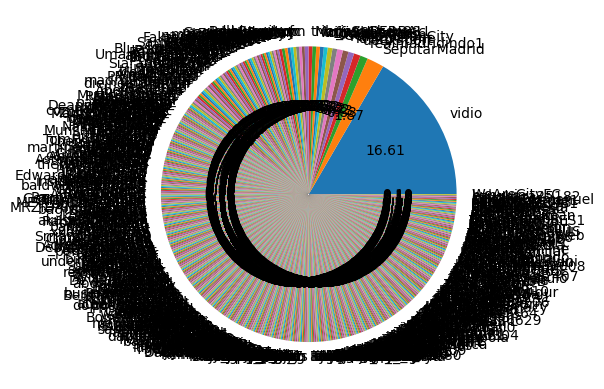

In [21]:
fig = plt.Figure(figsize=(25,25))
plt.pie(eda_data["username"].value_counts().values,
        labels=eda_data["username"].value_counts().index,
        autopct='%.2f')
plt.show()

Netral memiliki lebih banyak data dibandingkan label yang lain. 

## Data Distribution

In [22]:
eda_data['Length'] = eda_data['full_text'].str.len()
eda_data.head(10)

,full_text,username,Length
0,@RoxasDepp @jay_Hainen Aku yakin actually Man ...,amdjfr,160
1,@WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...,Fizhanmtdn,118
2,@buat_gaming @utdabout FA ada man city kalo Ch...,eupatreat,80
3,@beagleblueF1 @ManCity Rodri,Ritvars95LV,29
4,Malam ganjil. Gol ganjil Assalamualaikum piala...,abdanahmadd,104
5,Cole Palmer ngebet pindah dari @ManCity ke @Ch...,kopibukudanpena,118
6,Lihat statistik top score EPL ternyata cold Pa...,tejoharizola_,114
7,@keywai_ Plg susah arsenal. Easiest run in man...,MSallehuddin05,181
8,COLD PALMER Semenjak Man City lepas dia gue ud...,PunditNdut,254
9,@ahkirey gue mancity sama arsenal hahaha.,raedfield,41


In [23]:
print(f"Rata-rata panjang karakter tweet : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter tweet : 123.17


In [24]:
print(f"Jumlah panjang karakter tweet  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter tweet  : 118617.00


In [25]:
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

In [26]:
eda_data['Word_count'] = eda_data['full_text'].apply(word_count)
eda_data.head(10)

,full_text,username,Length,Word_count
0,@RoxasDepp @jay_Hainen Aku yakin actually Man ...,amdjfr,160,25
1,@WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...,Fizhanmtdn,118,21
2,@buat_gaming @utdabout FA ada man city kalo Ch...,eupatreat,80,13
3,@beagleblueF1 @ManCity Rodri,Ritvars95LV,29,3
4,Malam ganjil. Gol ganjil Assalamualaikum piala...,abdanahmadd,104,11
5,Cole Palmer ngebet pindah dari @ManCity ke @Ch...,kopibukudanpena,118,16
6,Lihat statistik top score EPL ternyata cold Pa...,tejoharizola_,114,15
7,@keywai_ Plg susah arsenal. Easiest run in man...,MSallehuddin05,181,33
8,COLD PALMER Semenjak Man City lepas dia gue ud...,PunditNdut,254,43
9,@ahkirey gue mancity sama arsenal hahaha.,raedfield,41,6


In [27]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 17174.00


In [28]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 17.83


In [29]:
eda_data['mean_word_length'] = eda_data['full_text'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

,full_text,username,Length,Word_count,mean_word_length
0,@RoxasDepp @jay_Hainen Aku yakin actually Man ...,amdjfr,160,25,5.440000
1,@WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...,Fizhanmtdn,118,21,4.666667
2,@buat_gaming @utdabout FA ada man city kalo Ch...,eupatreat,80,13,5.230769
3,@beagleblueF1 @ManCity Rodri,Ritvars95LV,29,3,8.666667
4,Malam ganjil. Gol ganjil Assalamualaikum piala...,abdanahmadd,104,11,8.545455
5,Cole Palmer ngebet pindah dari @ManCity ke @Ch...,kopibukudanpena,118,16,6.437500
6,Lihat statistik top score EPL ternyata cold Pa...,tejoharizola_,114,15,6.666667
7,@keywai_ Plg susah arsenal. Easiest run in man...,MSallehuddin05,181,33,4.515152
8,COLD PALMER Semenjak Man City lepas dia gue ud...,PunditNdut,254,43,4.930233
9,@ahkirey gue mancity sama arsenal hahaha.,raedfield,41,6,6.000000


In [30]:
eda_data['mean_sent_length'] = eda_data['full_text'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

,full_text,username,Length,Word_count,mean_word_length,mean_sent_length
0,@RoxasDepp @jay_Hainen Aku yakin actually Man ...,amdjfr,160,25,5.440000,79.50
1,@WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...,Fizhanmtdn,118,21,4.666667,118.00
2,@buat_gaming @utdabout FA ada man city kalo Ch...,eupatreat,80,13,5.230769,80.00
3,@beagleblueF1 @ManCity Rodri,Ritvars95LV,29,3,8.666667,28.00
4,Malam ganjil. Gol ganjil Assalamualaikum piala...,abdanahmadd,104,11,8.545455,51.50
5,Cole Palmer ngebet pindah dari @ManCity ke @Ch...,kopibukudanpena,118,16,6.437500,118.00
6,Lihat statistik top score EPL ternyata cold Pa...,tejoharizola_,114,15,6.666667,56.50
7,@keywai_ Plg susah arsenal. Easiest run in man...,MSallehuddin05,181,33,4.515152,44.50
8,COLD PALMER Semenjak Man City lepas dia gue ud...,PunditNdut,254,43,4.930233,62.75
9,@ahkirey gue mancity sama arsenal hahaha.,raedfield,41,6,6.000000,41.00


In [31]:
def visualize(col):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=eda_data[col], hue=eda_data['username'])
    plt.ylabel(col, labelpad=12.5)
    plt.title(col)

    plt.subplot(1, 2, 2)
    sns.displot(eda_data, x=col, kind="kde", hue='username', rug=True)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col)

    plt.tight_layout()
    plt.show()

In [32]:
#features = eda_data.columns.tolist()[2:]
#for feature in features:
    #visualize(feature)

# Preprocessing

In [33]:
kamus_singkatan = pandas.read_csv("./Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=",")
kamus_singkatan

,kata_gaul,kata_asal
0,awal,akhir
1,aamiin,amin
2,adek,adik
3,adlh,adalah
4,aer,air
...,...,...
1305,yoi,iya
1306,yup,ya
1307,yups,ya
1308,yupz,ya


In [34]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [35]:
kamus = create_kamus()
kamus

{'awal': 'akhir',
 'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'bebera

In [130]:
kamus.to_excel('Dataset/Preposessing/kamus.xlsx')

AttributeError: 'dict' object has no attribute 'to_excel'

## Case Folding

### Lowercase

In [36]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [37]:
print("Sebelum Lower Case:\nIni ADAlah Kalimat Testing yAaAaA!")
print()
print(f"Sesudah Lower Case:\n{tweet_lowercase('Ini ADAlah Kalimat Testing yAaAaA!')}")

Sebelum Lower Case:
Ini ADAlah Kalimat Testing yAaAaA!

Sesudah Lower Case:
ini adalah kalimat testing yaaaaa!


#### Sebelum

In [38]:
testing_data.head()

,full_text,username
0,@RoxasDepp @jay_Hainen Aku yakin actually Man ...,amdjfr
1,@WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...,Fizhanmtdn
2,@buat_gaming @utdabout FA ada man city kalo Ch...,eupatreat
3,@beagleblueF1 @ManCity Rodri,Ritvars95LV
4,Malam ganjil. Gol ganjil Assalamualaikum piala...,abdanahmadd


In [39]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_casefolding.xlsx')

#### Implementasi

In [40]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_lowercase)

CPU times: user 1.37 ms, sys: 110 µs, total: 1.48 ms
Wall time: 1.32 ms


#### Sesudah

In [41]:
testing_data.head(10)

,full_text,username
0,@roxasdepp @jay_hainen aku yakin actually man ...,amdjfr
1,@wtefpl @khairilanuar lahhhh tak baik taw ckp ...,Fizhanmtdn
2,@buat_gaming @utdabout fa ada man city kalo ch...,eupatreat
3,@beaglebluef1 @mancity rodri,Ritvars95LV
4,malam ganjil. gol ganjil assalamualaikum piala...,abdanahmadd
5,cole palmer ngebet pindah dari @mancity ke @ch...,kopibukudanpena
6,lihat statistik top score epl ternyata cold pa...,tejoharizola_
7,@keywai_ plg susah arsenal. easiest run in man...,MSallehuddin05
8,cold palmer semenjak man city lepas dia gue ud...,PunditNdut
9,@ahkirey gue mancity sama arsenal hahaha.,raedfield


In [42]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_casefolding.xlsx')

## Cleansing

### Menghapus username

In [43]:
def tweet_delete_username(tweet):
    userPattern       = '@[^\s]+'
    # Ngehapus kata "username" 
    tweet = re.sub(userPattern, '', tweet)
    
    return tweet

In [44]:
print("Sebelum:\n@Angel_siregar sebenernya aku suka sama kamu dulu, tapi kamu ternyata berubah")
print()
print(f"Setelah:\n{tweet_delete_username('@Angel_siregar sebenernya aku suka sama kamu dulu, tapi kamu ternyata berubah')}")

Sebelum:
@Angel_siregar sebenernya aku suka sama kamu dulu, tapi kamu ternyata berubah

Setelah:
 sebenernya aku suka sama kamu dulu, tapi kamu ternyata berubah


#### Sebelum

In [45]:
testing_data.head()

,full_text,username
0,@roxasdepp @jay_hainen aku yakin actually man ...,amdjfr
1,@wtefpl @khairilanuar lahhhh tak baik taw ckp ...,Fizhanmtdn
2,@buat_gaming @utdabout fa ada man city kalo ch...,eupatreat
3,@beaglebluef1 @mancity rodri,Ritvars95LV
4,malam ganjil. gol ganjil assalamualaikum piala...,abdanahmadd


In [46]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-hapususername.xlsx')

#### Implementasi

In [47]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_username)

CPU times: user 1.32 ms, sys: 106 µs, total: 1.43 ms
Wall time: 1.39 ms


#### Sesudah

In [48]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,lahhhh tak baik taw ckp chelsea tu bawahan h...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil assalamualaikum piala...,abdanahmadd


In [49]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-hapususername.xlsx')

### Menghapus url

In [50]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '', tweet)
    return tweet

In [51]:
print("Sebelum:\nhttps://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/ link belajar nlp")
print()
print(f"Setelah:\n{tweet_delete_url('https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/ link belajar nlp')}")

Sebelum:
https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/ link belajar nlp

Setelah:
 link belajar nlp


#### Sebelum

In [52]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,lahhhh tak baik taw ckp chelsea tu bawahan h...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil assalamualaikum piala...,abdanahmadd


In [53]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-hapusurl.xlsx')

#### Implementasi

In [54]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_url)

CPU times: user 6.68 ms, sys: 211 µs, total: 6.89 ms
Wall time: 6.78 ms


#### Sesudah

In [55]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,lahhhh tak baik taw ckp chelsea tu bawahan h...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil assalamualaikum piala...,abdanahmadd


In [56]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-hapusurl.xlsx')

### Menghapus kelebihan huruf

In [57]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [58]:
print("Sebelum:\nAku ganteng banget gillaaaaaa saat main gitar, manfaat banget")
print()
print(f"Sebelum:\n{tweet_delete_extra_letters('Aku ganteng banget gilllaaaaaa saat main gitar, manfaat banget')}")

Sebelum:
Aku ganteng banget gillaaaaaa saat main gitar, manfaat banget

Sebelum:
Aku ganteng banget gila saat main gitar, manfaat banget


#### Sebelum

In [59]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,lahhhh tak baik taw ckp chelsea tu bawahan h...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil assalamualaikum piala...,abdanahmadd


In [60]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-kelebihanhuruf.xlsx')

#### Implementasi

In [61]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_extra_letters)

CPU times: user 7.26 ms, sys: 0 ns, total: 7.26 ms
Wall time: 7.15 ms


#### Sesudah

In [62]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,lah tak baik taw ckp chelsea tu bawahan heba...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil assalamualaikum piala...,abdanahmadd


In [63]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-kelebihanhuruf.xlsx')

### Menghapus Noise

In [64]:
def tweet_delete_noise(tweet):
        tweet = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', tweet)
        tweet = re.sub(r'\b(dah|doi|dih|kok|pol|brow|emyu|skin|anjir|anjay|njir|bjir|jir|njay|anjoy|ajg|min|admin|gan|sis|sih|ke|di|dari|lah|kudu|oalah|lha|yah|yha|amp|n|nih|loo|hadeuh|waduh|sok|na|cing|hadeuh|loh|lho|bro|cui|cuy|yuk|yok|kuy|kan)\b', '', tweet)
        return tweet

In [65]:
print("Sebelum:\njir nadin amizah cantik banget cuy, pengen jadi suaminya.")
print()
print(f"Sebelum:\n{tweet_delete_noise('jir nadin amizah cantik banget cuy, pengen jadi suaminya.')}")

Sebelum:
jir nadin amizah cantik banget cuy, pengen jadi suaminya.

Sebelum:
 nadin amizah cantik banget , pengen jadi suaminya.


#### Sebelum

In [66]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,lah tak baik taw ckp chelsea tu bawahan heba...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil assalamualaikum piala...,abdanahmadd


In [67]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-menghapusnoise.xlsx')

#### Implementasi

In [68]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_noise)

CPU times: user 13 ms, sys: 0 ns, total: 13 ms
Wall time: 13.1 ms


#### Sesudah

In [69]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat j...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil piala inggriss ekhhe...,abdanahmadd


In [70]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-menghapusnoise.xlsx')

### Menghapus new line dan new text

In [71]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [72]:
print("Sebelum:\nAku ganteng banget gillaaaaaa saat main gitar, \nmanfaat\t banget")
print()
string_to_print = "Aku ganteng banget gilllaaaaaa saat main gitar, \\n manfaat\\t banget"
print(f"Setelah:\n{tweet_delete_new_line_new_text(string_to_print)}")

Sebelum:
Aku ganteng banget gillaaaaaa saat main gitar, 
manfaat	 banget

Setelah:
Aku ganteng banget gilllaaaaaa saat main gitar,   manfaat  banget


#### Sebelum

In [73]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat j...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil piala inggriss ekhhe...,abdanahmadd


In [74]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-newline.xlsx')

#### Implementasi

In [75]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_new_line_new_text)

CPU times: user 1.19 ms, sys: 92 µs, total: 1.28 ms
Wall time: 1.25 ms


#### Sesudah

In [76]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat j...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil piala inggriss ekhhe...,abdanahmadd


In [77]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-newline.xlsx')

### Menghapus angka

In [78]:
def tweet_delete_number(tweet):
    number = r'\d+' #Pola ngehapus angka
    tweet = re.sub(number, '', tweet)
    return tweet

In [79]:
print("Sebelum:\nin242i adal1321ah kalimat2 testing 12312yaaaaa!")
print()
print(f"Sebelum:\n{tweet_delete_number('in242i adal1321ah kalimat2 testing 12312yaaaaa!')}")

Sebelum:
in242i adal1321ah kalimat2 testing 12312yaaaaa!

Sebelum:
ini adalah kalimat testing yaaaaa!


#### Sebelum

In [80]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat j...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil piala inggriss ekhhe...,abdanahmadd


In [81]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-menghapusangka.xlsx')

#### Implementasi

In [82]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_number)

CPU times: user 5.34 ms, sys: 0 ns, total: 5.34 ms
Wall time: 5.25 ms


#### Sesudah

In [83]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat j...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil piala inggriss ekhhe...,abdanahmadd


In [84]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-menghapusangka.xlsx')

### Menghapus tanda baca

In [85]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [86]:
print("Sebelum:\neh seriusan?@pak_adang nasi padangnya enak banget gilaa! jadi pengen goyang nasi padan,g,.!!!! ehehe:)")
print()
print(f"Sebelum:\n{tweet_delete_punctuation('eh seriusan?@pak_adang nasi padangnya enak banget gilaa! jadi pengen goyang nasi padan,g,.!!!! ehehe:)')}")

Sebelum:
eh seriusan?@pak_adang nasi padangnya enak banget gilaa! jadi pengen goyang nasi padan,g,.!!!! ehehe:)

Sebelum:
eh seriusan  pak_adang nasi padangnya enak banget gilaa  jadi pengen goyang nasi padan g       ehehe  


#### Sebelum

In [87]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat j...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil. gol ganjil piala inggriss ekhhe...,abdanahmadd


In [88]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-menghapustandabaca.xlsx')

#### Implementasi

In [89]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_punctuation)

CPU times: user 3.04 ms, sys: 0 ns, total: 3.04 ms
Wall time: 3 ms


#### Sesudah

In [90]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat j...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil gol ganjil piala inggriss ekhhe...,abdanahmadd


In [91]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-menghapustandabaca.xlsx')

### Menghapus Extra Spasi

In [92]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [93]:
print("Sebelum:\nyoooo  . apa kabar? ")
print()
print(f"Sesudah:\n{tweet_delete_extra_space('yoooo.   apa kabar? ')}")

Sebelum:
yoooo  . apa kabar? 

Sesudah:
yoooo. apa kabar?


#### Sebelum

In [94]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensu...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat j...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harap...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil gol ganjil piala inggriss ekhhe...,abdanahmadd


In [95]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-menghapusextraspasi.xlsx')

#### Implementasi

In [96]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_extra_space)

CPU times: user 13 ms, sys: 0 ns, total: 13 ms
Wall time: 12.8 ms


#### Sesudah

In [97]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensure...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat jer ...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harapan...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil gol ganjil piala inggriss ekhhem,abdanahmadd


In [98]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-menghapusextraspasi.xlsx')

## Tokenization

In [99]:
from nltk.tokenize import word_tokenize 

In [100]:
def tweet_tokenize(tweet):
    return word_tokenize(tweet)

In [101]:
example = "Kalo kamu pertukaran pelajar ke Korea, maka aku akan setia menunggumu disini."
tokens = tweet_tokenize(example)
print(tokens)

['Kalo', 'kamu', 'pertukaran', 'pelajar', 'ke', 'Korea', ',', 'maka', 'aku', 'akan', 'setia', 'menunggumu', 'disini', '.']


#### Sebelum

In [102]:
testing_data.head()

,full_text,username
0,aku yakin actually man city lobby untuk ensure...,amdjfr
1,tak baik taw ckp chelsea tu bawahan hebat jer ...,Fizhanmtdn
2,fa ada man city kalo chelsea masih ada harapan...,eupatreat
3,rodri,Ritvars95LV
4,malam ganjil gol ganjil piala inggriss ekhhem,abdanahmadd


In [103]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_tokenization.xlsx')

#### Implementasi

In [104]:
%%time
testing_data['full_text'] = testing_data['full_text'].apply(tweet_tokenize)

CPU times: user 95.9 ms, sys: 3.7 ms, total: 99.6 ms
Wall time: 98.5 ms


#### Sesudah

In [105]:
testing_data.head()

,full_text,username
0,"[aku, yakin, actually, man, city, lobby, untuk...",amdjfr
1,"[tak, baik, taw, ckp, chelsea, tu, bawahan, he...",Fizhanmtdn
2,"[fa, ada, man, city, kalo, chelsea, masih, ada...",eupatreat
3,[rodri],Ritvars95LV
4,"[malam, ganjil, gol, ganjil, piala, inggriss, ...",abdanahmadd


In [106]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_tokenization.xlsx')

## Normalization

In [107]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    # Replace the contractions with their corresponding replacements
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [108]:
example = "klo kmu pertukaran pelajar ke Korea, maka ak akan setia menunggumu disini."
tokens = tweet_tokenize(example)
tokenz_with_expanded_contractions = [tweet_replace_contractions(tweet) for tweet in tokens]

# Print the result
for tweet in tokenz_with_expanded_contractions:
    print(tweet)

kalau
kamu
pertukaran
pelajar
ke
Korea
,
maka
saya
akan
setia
menunggumu
disini
.


#### Sebelum

In [109]:
testing_data.head()

,full_text,username
0,"[aku, yakin, actually, man, city, lobby, untuk...",amdjfr
1,"[tak, baik, taw, ckp, chelsea, tu, bawahan, he...",Fizhanmtdn
2,"[fa, ada, man, city, kalo, chelsea, masih, ada...",eupatreat
3,[rodri],Ritvars95LV
4,"[malam, ganjil, gol, ganjil, piala, inggriss, ...",abdanahmadd


In [110]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_normalization.xlsx')

#### Implementasi

In [111]:
%%time
for i in range(0,len(testing_data)):
    himpunan_kata=[]
    for tokenize_tweet in testing_data["full_text"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    testing_data["full_text"][i]=himpunan_kata
    i+1

CPU times: user 11.4 s, sys: 0 ns, total: 11.4 s
Wall time: 11.4 s


#### Sesudah

In [112]:
testing_data.head()

,full_text,username
0,"[saya, yakin, actually, man, city, lobby, untu...",amdjfr
1,"[tak, baik, taw, cukup, chelsea, itu, bawahan,...",Fizhanmtdn
2,"[fa, ada, man, city, kalau, chelsea, masih, ad...",eupatreat
3,[rodri],Ritvars95LV
4,"[malam, ganjil, gol, ganjil, piala, inggriss, ...",abdanahmadd


In [113]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_normalization.xlsx')

### Stopwords

In [114]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [115]:
example = "klo kmu pertukaran pelajar ke Korea, maka ak akan setia menunggumu di sini."
tokens = tweet_tokenize(example)
tokenz_with_stop_removed = [tweet_stopwords_removal(tweet) for tweet in tokens]

# Print the result
for tweet in tokenz_with_stop_removed:
    print(tweet,end=" ")

klo kmu pertukaran pelajar  Korea ,  ak  setia menunggumu  sini . 

#### Sebelum

In [116]:
testing_data.head()

,full_text,username
0,"[saya, yakin, actually, man, city, lobby, untu...",amdjfr
1,"[tak, baik, taw, cukup, chelsea, itu, bawahan,...",Fizhanmtdn
2,"[fa, ada, man, city, kalau, chelsea, masih, ad...",eupatreat
3,[rodri],Ritvars95LV
4,"[malam, ganjil, gol, ganjil, piala, inggriss, ...",abdanahmadd


In [117]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_stopword.xlsx')

#### Implementasi

In [118]:
%%time
for i in range(0,len(testing_data)):
    himpunan_kata=[]
    for tokenize_tweet in testing_data["full_text"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    testing_data["full_text"][i]=himpunan_kata
    i+1

CPU times: user 642 ms, sys: 12.2 ms, total: 654 ms
Wall time: 644 ms


#### Sesudah

In [119]:
testing_data.head()

,full_text,username
0,"[yakin, actually, man, city, lobby, ensure, te...",amdjfr
1,"[tak, baik, taw, cukup, chelsea, bawahan, heba...",Fizhanmtdn
2,"[fa, man, city, kalau, chelsea, harapan, menang]",eupatreat
3,[rodri],Ritvars95LV
4,"[malam, ganjil, gol, ganjil, piala, inggriss, ...",abdanahmadd


In [120]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_stopword.xlsx')

## Emoji Transformation

In [151]:
! pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 33.3 MB/s eta 0:00:00


In [152]:
import emoji

In [163]:
! pip install googletrans

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 10.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15715 sha256=b756c93dea8acfb79e11dfa31db73dc4ce7f82449bbd01c752249d41a2cff431
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.0.1
    Uninstallin

In [167]:
from googletrans import Translator

In [183]:
def tweet_delete_emoji(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

In [184]:
example = "klo kmu pertukaran pelajar ke Korea 😍,  maka ak akan setia menunggumu di sini ❤️❤️❤️."
tokens = tweet_tokenize(example)
tokenz_with_emoji_removed = [tweet_delete_emoji(tweet) for tweet in tokens]

# Print the result
for tweet in tokenz_with_emoji_removed:
    print(tweet,end=" ")

klo kmu pertukaran pelajar ke Korea :smiling_face_with_heart-eyes: , maka ak akan setia menunggumu di sini :red_heart::red_heart::red_heart: . 

#### Sebelum

In [123]:
testing_data.head()

,full_text,username
0,"[yakin, actually, man, city, lobby, ensure, te...",amdjfr
1,"[tak, baik, taw, cukup, chelsea, bawahan, heba...",Fizhanmtdn
2,"[fa, man, city, kalau, chelsea, harapan, menang]",eupatreat
3,[rodri],Ritvars95LV
4,"[malam, ganjil, gol, ganjil, piala, inggriss, ...",abdanahmadd


In [124]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_emoji.xlsx')

#### Implementasi

In [125]:
%%time
for i in range(0,len(testing_data)):
    himpunan_kata=[]
    for tokenize_tweet in testing_data["full_text"][i]:
        tokenize_tweet = tweet_delete_emoji(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    testing_data["full_text"][i]=himpunan_kata
    i+1

CPU times: user 709 ms, sys: 4.15 ms, total: 713 ms
Wall time: 703 ms


#### Sesudah

In [126]:
testing_data.head()

,full_text,username
0,"[yakin, actually, man, city, lobby, ensure, te...",amdjfr
1,"[tak, baik, taw, cukup, chelsea, bawahan, heba...",Fizhanmtdn
2,"[fa, man, city, kalau, chelsea, harapan, menang]",eupatreat
3,[rodri],Ritvars95LV
4,"[malam, ganjil, gol, ganjil, piala, inggriss, ...",abdanahmadd


In [127]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_emoji.xlsx')

## Clean

In [128]:
# train_data.to_csv("Clean_train_data.csv")